In [1]:
import csv
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from IPython.display import Image, HTML, display
from tensorflow import keras
emg_data = np.empty([0,8])
emg_data_closing = np.zeros([10,8])
emg_data_rest = np.zeros([10,8])
emg_data_opening = np.zeros([10,8])
c = 51
o = 44
r = 40
time= np.zeros([10])
delta=0.55/9
for i in range (10):
    time[i]= delta*i
#Define the number of closing, rest and opening data in c, r, o
for j in range(c):
    fileh = open("/home/destiny/anaconda3/envs/virtual_environment/catkin_ws/src/ros_myo/scripts/EMG_data/Closing/Data/c" + str(j+1) + ".csv", 'r+')
    import matplotlib.pyplot as plt
    %matplotlib inline
    data = pd.read_csv(fileh)
    emg_data_raw = data.data
    dim = len(emg_data_raw)
    for i in range(10):
        clean = emg_data_raw[i]
        clean = clean[clean.find('[') + 1:]
        clean = clean[:clean.find(']')]
        clean = clean.split(',')
        for k in range(len(clean)):
            clean[k] = int(clean[k])
        emg_data = np.r_[emg_data, np.asarray(clean).reshape(1, 8)]
    emg_data_closing = emg_data_closing + emg_data
    emg_data = np.empty([0,8])
emg_data_closing = (emg_data_closing/c).astype(int)

for j in range(r):
    fileh = open("/home/destiny/anaconda3/envs/virtual_environment/catkin_ws/src/ros_myo/scripts/EMG_data/Rest/Data/r" + str(j+1) + ".csv", 'r+')
    import matplotlib.pyplot as plt
    %matplotlib inline
    data = pd.read_csv(fileh)
    emg_data_raw = data.data
    dim = len(emg_data_raw)
    for i in range(10):
        clean = emg_data_raw[i]
        clean = clean[clean.find('[') + 1:]
        clean = clean[:clean.find(']')]
        clean = clean.split(',')
        for k in range(len(clean)):
            clean[k] = int(clean[k])
        emg_data = np.r_[emg_data, np.asarray(clean).reshape(1, 8)]
    emg_data_rest = emg_data_rest + emg_data
    emg_data = np.empty([0,8])
emg_data_rest = (emg_data_closing/r).astype(int)

for j in range(o):
    fileh = open("/home/destiny/anaconda3/envs/virtual_environment/catkin_ws/src/ros_myo/scripts/EMG_data/Opening/Data/o" + str(j+1) + ".csv", 'r+')
    import matplotlib.pyplot as plt
    %matplotlib inline
    data = pd.read_csv(fileh)
    emg_data_raw = data.data
    dim = len(emg_data_raw)
    for i in range(10):
        clean = emg_data_raw[i]
        clean = clean[clean.find('[') + 1:]
        clean = clean[:clean.find(']')]
        clean = clean.split(',')
        for k in range(len(clean)):
            clean[k] = int(clean[k])
        emg_data = np.r_[emg_data, np.asarray(clean).reshape(1, 8)]
    emg_data_opening = emg_data_opening + emg_data
    emg_data = np.empty([0,8])
emg_data_opening = (emg_data_opening/o).astype(int)

/home/destiny/anaconda3/envs/virtual_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/destiny/anaconda3/envs/virtual_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/destiny/anaconda3/envs/virtual_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

# EMG Data Analysis with respect to Flexor Forearm Muscles and Forearm Extensor Muscles

Once we have worn EMG Myo Armband with the USB port facing your wrist, we know that the electrodes number 1, 6, 7 and 8 are related to the Flexor Forearm Muscles while the numbers 3, 4 and 5 are related to the Forearm Extensor Muscles. That means that we can analyze their activities during the process of closing, rest or opening the hand and compare them.

In [2]:
display(HTML("<table><tr><td><img src='Description EMG Armband.jpg' align='middle'></td></tr><tr><td><img src='Flexor.png' align='left'></td><td><img src='Extensor.png' align = 'left'></td></tr></table>"))
#Image("EMG.png")
#Image("Flexors.png")
#Image("Extensors.png")

# EMG Data Analysis: Closing

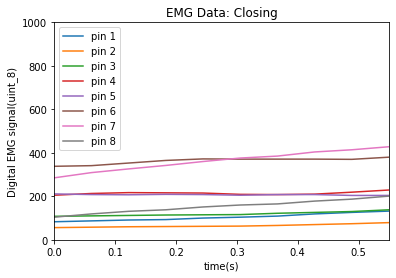

In [3]:
plt.plot(time,emg_data_closing[:,0],label = ('pin 1'))
plt.plot(time,emg_data_closing[:,1],label = ('pin 2'))
plt.plot(time,emg_data_closing[:,2],label = ('pin 3'))
plt.plot(time,emg_data_closing[:,3],label = ('pin 4'))
plt.plot(time,emg_data_closing[:,4],label = ('pin 5'))
plt.plot(time,emg_data_closing[:,5],label = ('pin 6'))
plt.plot(time,emg_data_closing[:,6],label = ('pin 7'))
plt.plot(time,emg_data_closing[:,7],label = ('pin 8'))
plt.xlim([0,0.55])
plt.ylim([0,1000])
plt.xlabel('time(s)')
plt.ylabel('Digital EMG signal(uint_8)')
plt.title('EMG Data: Closing')
plt.legend()

The activities recorded by the electrodes number 6 and 7 are "stronger" when I close the hand. Infact these electrodes are located in the "Flexor Forearm Muscles" location, that are the muscles responsible for closing the fingers and bending the wrist.

# EMG Data Analysis: Opening

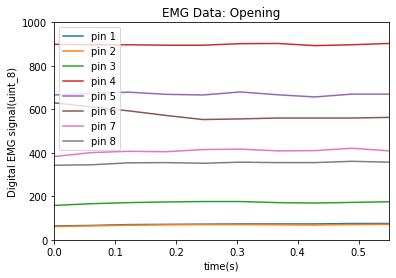

In [4]:
plt.plot(time,emg_data_opening[:,0],label = ('pin 1'))
plt.plot(time,emg_data_opening[:,1],label = ('pin 2'))
plt.plot(time,emg_data_opening[:,2],label = ('pin 3'))
plt.plot(time,emg_data_opening[:,3],label = ('pin 4'))
plt.plot(time,emg_data_opening[:,4],label = ('pin 5'))
plt.plot(time,emg_data_opening[:,5],label = ('pin 6'))
plt.plot(time,emg_data_opening[:,6],label = ('pin 7'))
plt.plot(time,emg_data_opening[:,7],label = ('pin 8'))
plt.xlim([0,0.55])
plt.ylim([0,1000])
plt.xlabel('time(s)')
plt.ylabel('Digital EMG signal(uint_8)')
plt.title('EMG Data: Opening')
plt.legend()

In this case the highest values are related to the pin number 4 and 5. Moreover, these values are even higher than in the closing case. Generally with this analysis we can say that with our EMG Myo Armband is easier to detect the activities of the forearm flexors muscles which are really involved in the opening part. Note that the value of the pin 4 seems to be higher than in the closing case, and that will be analyzed better in the section about the differences between opening and closing states.

# EMG Data Analysis: Rest

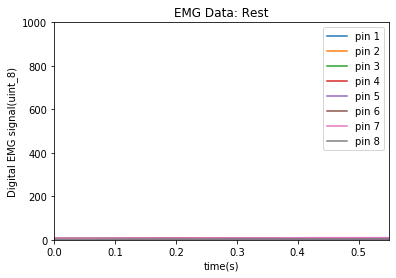

In [5]:
plt.plot(time,emg_data_rest[:,0],label = ('pin 1'))
plt.plot(time,emg_data_rest[:,1],label = ('pin 2'))
plt.plot(time,emg_data_rest[:,2],label = ('pin 3'))
plt.plot(time,emg_data_rest[:,3],label = ('pin 4'))
plt.plot(time,emg_data_rest[:,4],label = ('pin 5'))
plt.plot(time,emg_data_rest[:,5],label = ('pin 6'))
plt.plot(time,emg_data_rest[:,6],label = ('pin 7'))
plt.plot(time,emg_data_rest[:,7],label = ('pin 8'))
plt.xlim([0,0.55])
plt.ylim([0,1000])
plt.xlabel('time(s)')
plt.ylabel('Digital EMG signal(uint_8)')
plt.title('EMG Data: Rest')
plt.legend()

# EMG Data: Difference Closing-Opening



The higher value during the whole process is about the 4th electrode in the opening case, while the other values of the electrodes in this case are low.

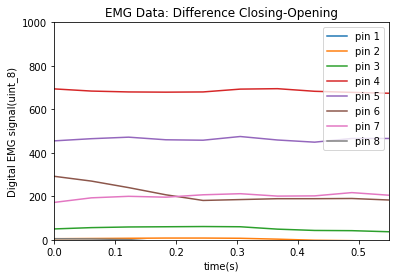

In [6]:
plt.plot(time,emg_data_opening[:,0]-emg_data_closing[:,0],label = ('pin 1'))
plt.plot(time,emg_data_opening[:,1]-emg_data_closing[:,1],label = ('pin 2'))
plt.plot(time,emg_data_opening[:,2]-emg_data_closing[:,2],label = ('pin 3'))
plt.plot(time,emg_data_opening[:,3]-emg_data_closing[:,3],label = ('pin 4'))
plt.plot(time,emg_data_opening[:,4]-emg_data_closing[:,4],label = ('pin 5'))
plt.plot(time,emg_data_opening[:,5]-emg_data_closing[:,5],label = ('pin 6'))
plt.plot(time,emg_data_opening[:,6]-emg_data_closing[:,4],label = ('pin 7'))
plt.plot(time,emg_data_opening[:,7]-emg_data_closing[:,5],label = ('pin 8'))
plt.xlim([0,0.55])
plt.ylim([0,1000])
plt.xlabel('time(s)')
plt.ylabel('Digital EMG signal(uint_8)')
plt.title('EMG Data: Difference Closing-Opening')
plt.legend()